# EMPLOYEE SALARY PREDICTION

### INTRODUCTION
> Employee salary prediction is the process of creating a statistical machine learning model and training it with suitable data (based on salaries for different job titles and the factors affecting them) in order for the model to be able to estimate the compensation of individuals accurately based on the professional factors affecting their jobs/careers. This practice is very valuable, as it can help ensure and implement proper and fair pay pactices and, if automated, can help save time, energy, and resources in case of large number of employees and numerous job roles/titles. The goal of the employee salary prediction project is to create a proper salary prediction model using the most suitable regression algorithm that is fair and unbiased and can predict salaries with very high accuracy and little to no error. 

### PROBLEM STATEMENT
> Salary is definitively one of the most important reasons for a person to be doing a job in today's world. It is not only the source of one of the most important resources today, but also helps carve out a person's life and personal position in today's world, helping to shape a proper and secure lifestyle. Deciding accurate salaries for different job titles and positions is essential for respecting the employees' hardwork, knowledge, and experience while simultaneously attracting and retaining talent. The core problem is to be be able to correctly and precisely estimate salaries for employees based on important factors such as their level of education, knowledge and experience, skills, job title, role, and position, while making sure that both the employee and the employer/organization have proper benefits as a whole. 
### PROPOSED SOLUTION
> A potent solution is to develop a machine learning model using random forest regression which, after being trained with proper data to predict salaries accurately, has learnt the most important factors in deciding salaries for different job roles for employees with different backgrounds properly and without bias towards any specific category. 

### PROJECT OUTLINE
> This project involves the following steps:-
>- Collecting the proper datasets.
>- Installing and importing the required libraries.
>- Reading the files, learning about their basic details, and preprocessing them to remove missing values.
>- Performing exploratory data analysis.
>- Predicting salaries using Random Forest Regression after fine-tuning the model.
>- Evaluating the model's performance using suitable metrics.
>- Performing one final test. 

### DATASETS
>- <b>TRAINING FILE</b> <i>(convention: 'F')</i>: __[link to TRAINING FILE (original)](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer)__.
>- <b>TESTING FILE</b> <i>(convention: 'T')</i>: __[link to TESTING FILE (original)](https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data)__.
>- <b>FINAL TESTING FILE</b> <i>(convention: 'FT')</i>: __[link to FINAL TESTING FILE (customized)](https://drive.google.com/file/d/1i5TeLFphOM0IJjhxS0DzXyogus3S85r_/view?usp=drive_link)__.
>- <b>DRIVE LINK FOR ALL THE CLEANED FILES</b>: __[DRIVE LINK](https://drive.google.com/drive/folders/1Hs7h8r54hSvrHB1RnJiEUmYORZSUM-6z?usp=drive_link)__. 

#### Installing and importing the necessary libraries.

In [1]:
%pip install seaborn
%pip install joblib
%pip install gradio

In [2]:
import numpy as nu
import pandas as pa
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split as tts,GridSearchCV as GSC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as MAE,mean_squared_error as MSE,r2_score as R2
from sklearn.preprocessing import LabelEncoder as LE
import joblib as jl
from joblib import dump
import gradio as gr
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.
/lib/python3.12/site-packages/huggingface_hub/utils/_fixes.py:22: UserWarning: only soft file lock is available
  from filelock import BaseFileLock, FileLock, SoftFileLock, Timeout


#### Reading the files, learning about their basic details, and preprocessing them to remove missing values.

In [3]:
F=pa.read_csv('FILE.csv')
T=pa.read_csv('TESTFILE.csv')

In [4]:
print("Training File:- ")
F.head()

Training File:- 


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,63,Male,High School,Manager,8,84620.05366
1,59,Male,PhD,Director,11,142591.25590
2,61,Female,Bachelor,Manager,28,97800.25540
3,45,Male,High School,Director,29,96834.67128
4,26,Female,PhD,Analyst,25,132157.78620


In [5]:
print("Testing File:- ")
T.head()

Testing File:- 


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
print(f"Shape of Training File: {F.shape}.")
print(f"Shape of Testing File: {T.shape}.")

Shape of Training File: (1000, 6).
Shape of Testing File: (375, 6).


In [7]:
print("Details of Training File:- ")
F.info()

Details of Training File:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Gender               1000 non-null   object 
 2   Education Level      1000 non-null   object 
 3   Job Title            1000 non-null   object 
 4   Years of Experience  1000 non-null   int64  
 5   Salary               1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 35.2+ KB


In [8]:
print("Details of Testing File:- ")
T.info()

Details of Testing File:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 13.3+ KB


In [9]:
print(f"Description of Training File:- ")
F.describe()

Description of Training File:- 


,Age,Years of Experience,Salary
count,1000.000000,1000.000000,1000.000000
mean,42.377000,14.771000,105558.404238
std,13.609412,8.341111,28256.972074
min,20.000000,1.000000,33510.510670
25%,30.000000,7.000000,85032.141520
50%,43.000000,15.000000,104314.518300
75%,55.000000,22.000000,126804.047550
max,64.000000,29.000000,193016.602100


In [10]:
print(f"Description of Testing File:- ")
T.describe()

Description of Testing File:- 


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [11]:
F.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [12]:
T.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [13]:
F.dropna(inplace=True)

In [14]:
F.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [15]:
T.dropna(inplace=True)

In [16]:
T.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [17]:
print(f"Shape of Training File: {F.shape}.")
print(f"Shape of Testing File: {T.shape}.")

Shape of Training File: (1000, 6).
Shape of Testing File: (373, 6).


In [18]:
F['Job Title'].value_counts()

Job Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64

In [19]:
T['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [20]:
F['Education Level'].value_counts()

Education Level
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

In [21]:
T['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [22]:
T['Education Level'].replace(["Bachelor's","Master's"],["Bachelor","Master"],inplace=True)
T['Education Level'].value_counts()

Education Level
Bachelor    224
Master       98
PhD          51
Name: count, dtype: int64

In [23]:
F['Gender'].value_counts()

Gender
Male      516
Female    484
Name: count, dtype: int64

In [24]:
T['Gender'].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

#### Performing exploratory data analysis.

Genderwise classification of workers for Training File:- 



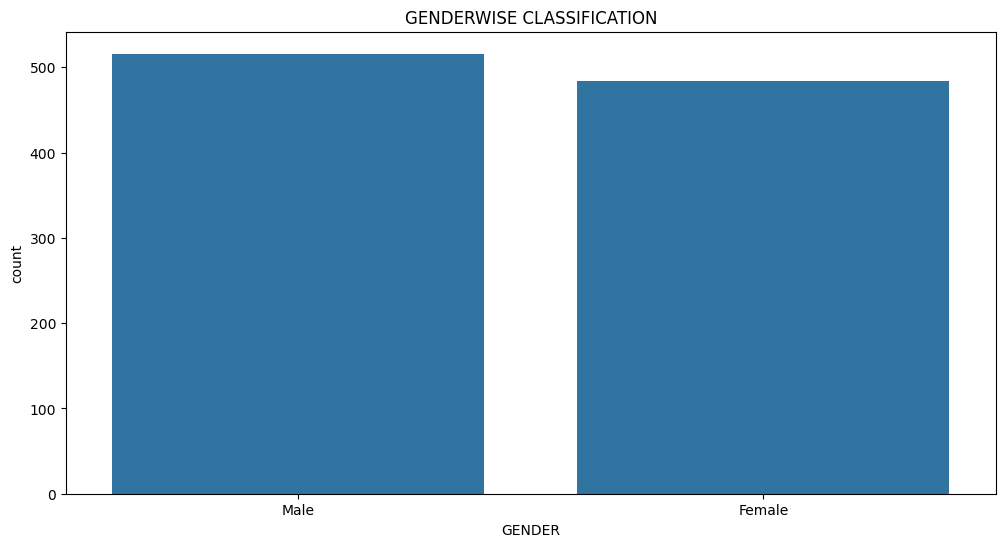

In [25]:
print("Genderwise classification of workers for Training File:- \n")
mp.figure(figsize=(12,6))
sb.countplot(x='Gender',data=F)
mp.title('GENDERWISE CLASSIFICATION')
mp.xlabel('GENDER')
mp.show()

Education levelwise classification of workers for Training File:- 



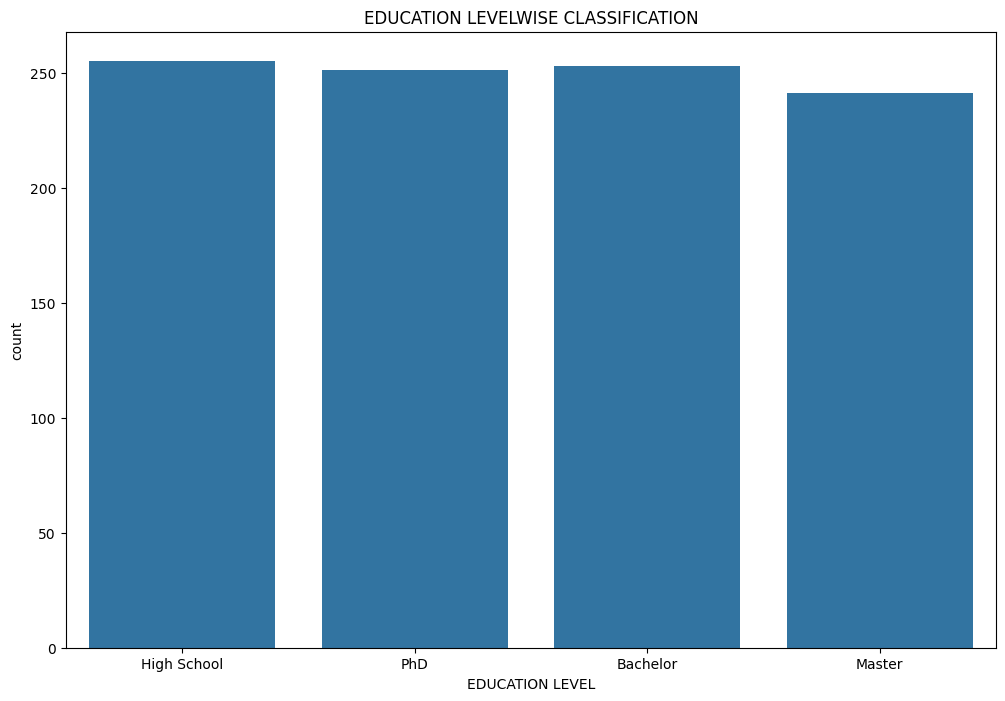

In [26]:
print("Education levelwise classification of workers for Training File:- \n")
mp.figure(figsize=(12,8))
sb.countplot(x='Education Level',data=F)
mp.title('EDUCATION LEVELWISE CLASSIFICATION')
mp.xlabel('EDUCATION LEVEL')
mp.show()

Highest paying jobs (Training File):- 



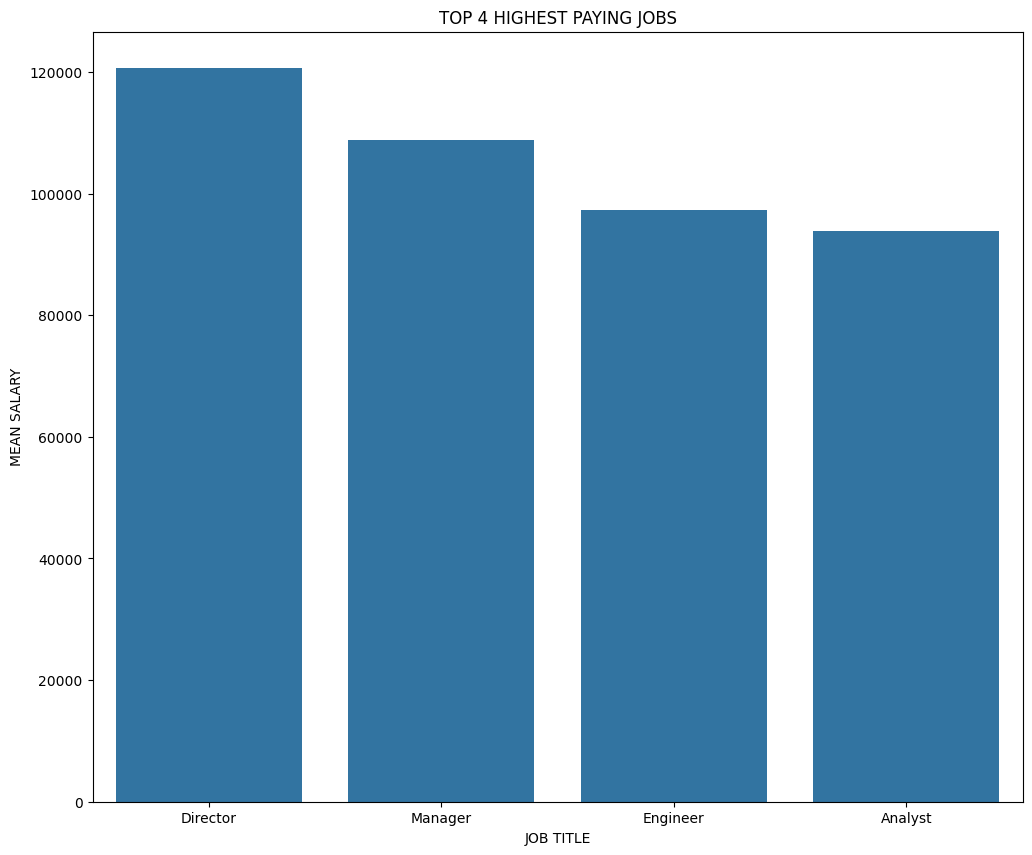

In [27]:
print("Highest paying jobs (Training File):- \n")
h=F.groupby('Job Title')['Salary'].mean().nlargest(4)
mp.figure(figsize=(12,10))
sb.barplot(x=h.index,y=h.values)
mp.title('TOP 4 HIGHEST PAYING JOBS')
mp.xlabel('JOB TITLE')
mp.ylabel('MEAN SALARY')
mp.show()

Salary amounts for different education levelwise grouped genders (Training File):- 



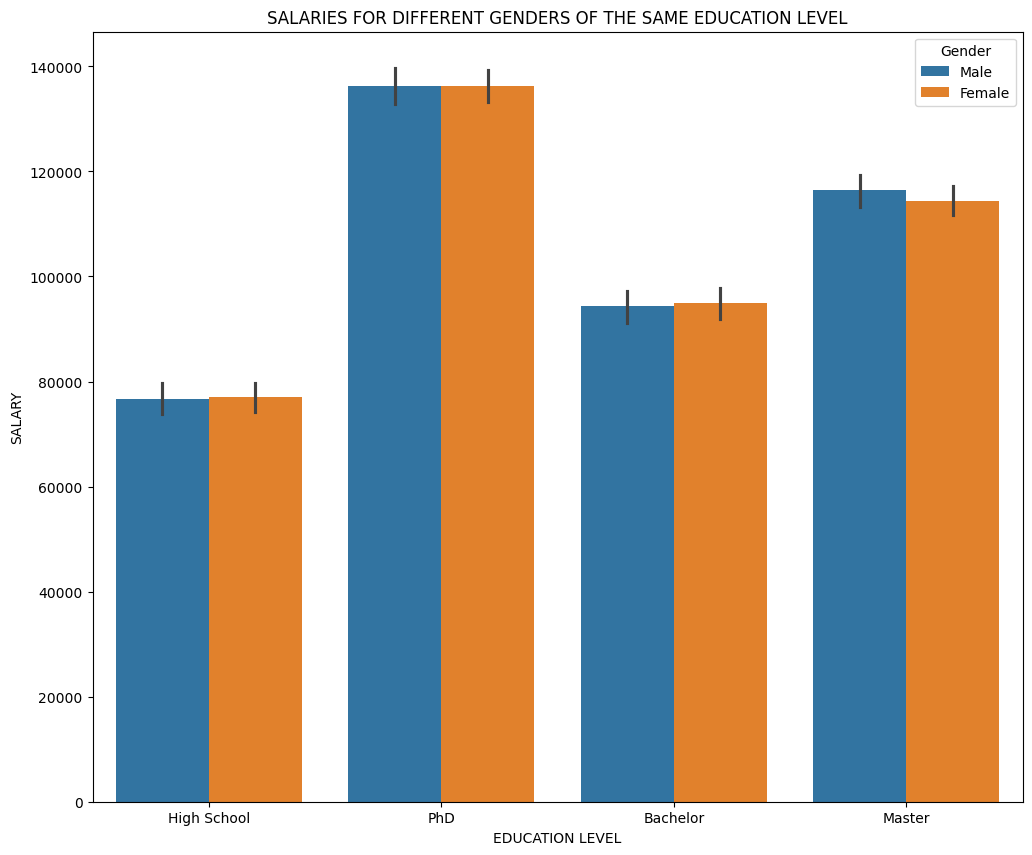

In [28]:
print("Salary amounts for different education levelwise grouped genders (Training File):- \n")
mp.figure(figsize=(12,10))
sb.barplot(x='Education Level',y='Salary',data=F,hue='Gender')
mp.title('SALARIES FOR DIFFERENT GENDERS OF THE SAME EDUCATION LEVEL')
mp.xlabel('EDUCATION LEVEL')
mp.ylabel('SALARY')
mp.show()

Genderwise classification of workers for Testing File:- 



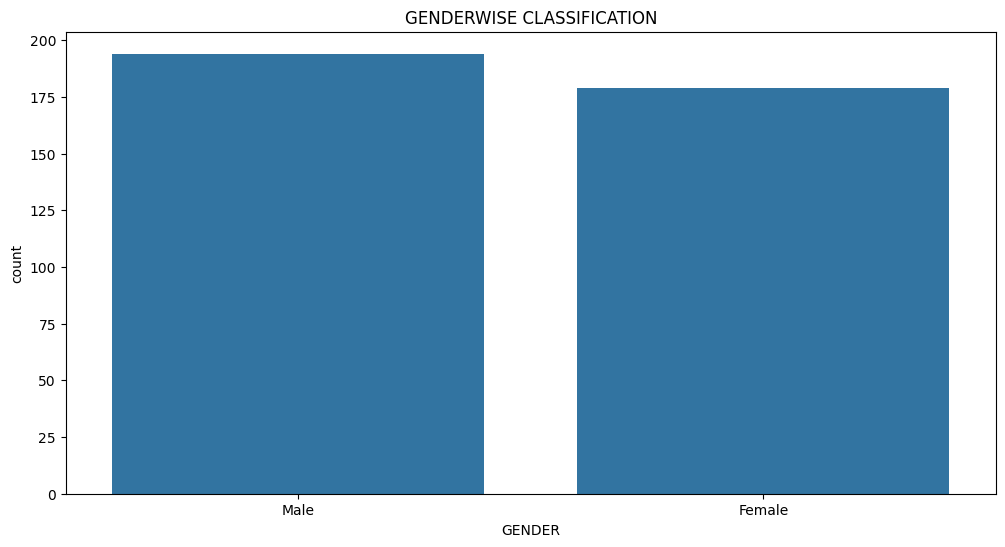

In [29]:
print("Genderwise classification of workers for Testing File:- \n")
mp.figure(figsize=(12,6))
sb.countplot(x='Gender',data=T)
mp.title('GENDERWISE CLASSIFICATION')
mp.xlabel('GENDER')
mp.show()

Education levelwise classification of workers for Testing File:- 



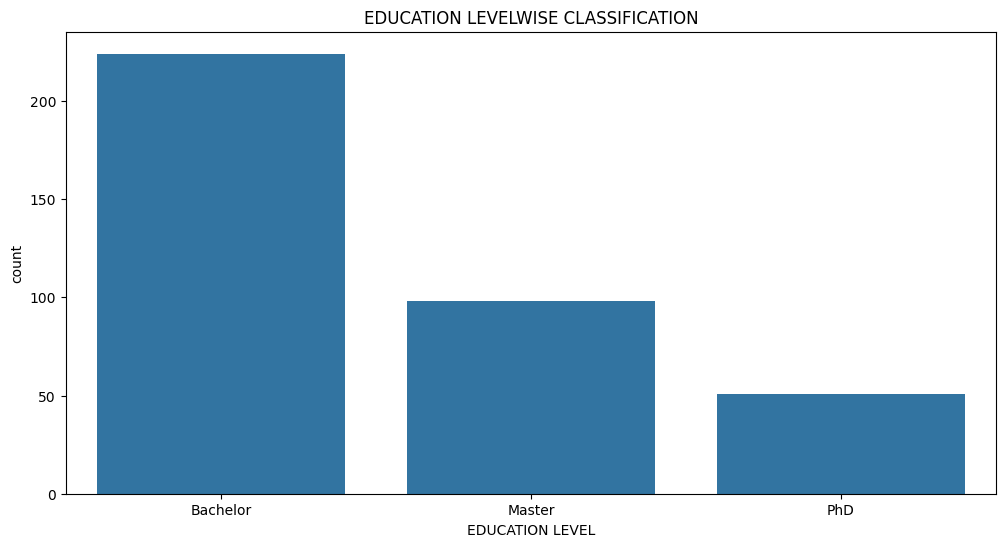

In [30]:
print("Education levelwise classification of workers for Testing File:- \n")
mp.figure(figsize=(12,6))
sb.countplot(x='Education Level',data=T)
mp.title('EDUCATION LEVELWISE CLASSIFICATION')
mp.xlabel('EDUCATION LEVEL')
mp.show()

Highest paying jobs (Testing File):- 



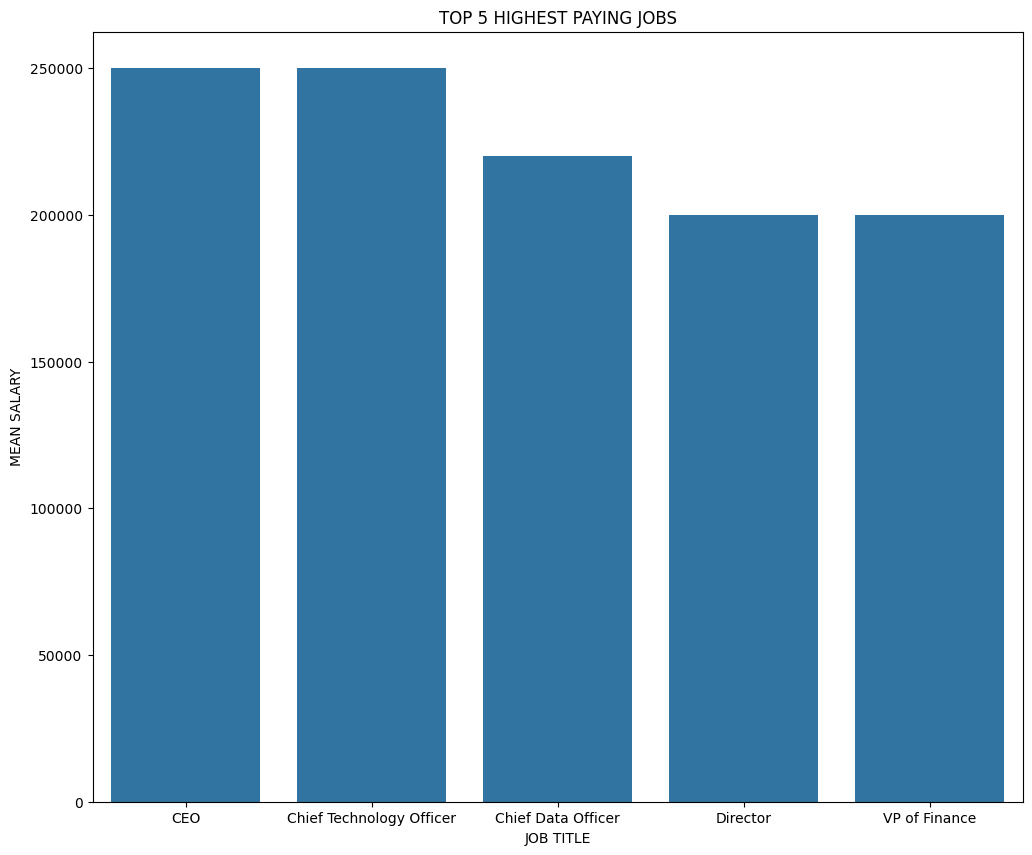

In [31]:
print("Highest paying jobs (Testing File):- \n")
h=T.groupby('Job Title')['Salary'].mean().nlargest(5)
mp.figure(figsize=(12,10))
sb.barplot(x=h.index,y=h.values)
mp.title('TOP 5 HIGHEST PAYING JOBS')
mp.xlabel('JOB TITLE')
mp.ylabel('MEAN SALARY')
mp.show()

Salary amounts for different education levelwise grouped genders (Testing File):- 



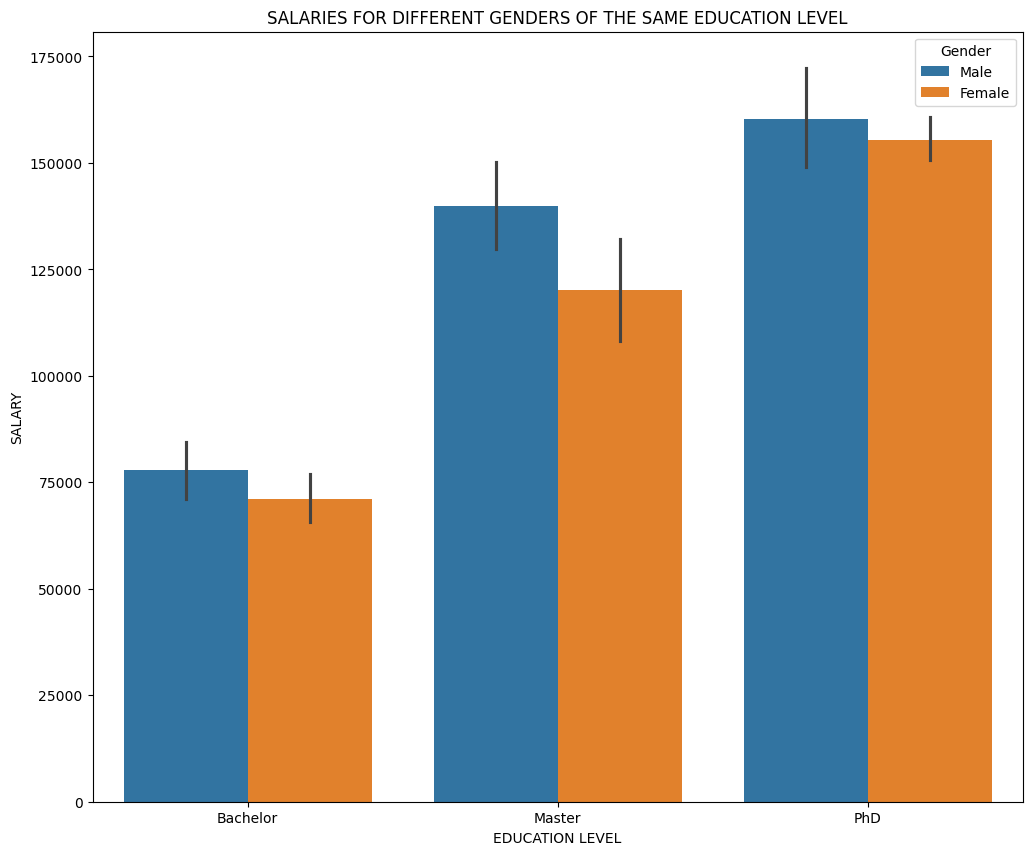

In [32]:
print("Salary amounts for different education levelwise grouped genders (Testing File):- \n")
mp.figure(figsize=(12,10))
sb.barplot(x='Education Level',y='Salary',data=T,hue='Gender')
mp.title('SALARIES FOR DIFFERENT GENDERS OF THE SAME EDUCATION LEVEL')
mp.xlabel('EDUCATION LEVEL')
mp.ylabel('SALARY')
mp.show()

#### Using Random Forest Regression to predict salaries.

In [33]:
le=LE()
F['Gender']=le.fit_transform(F['Gender'])
F['Education Level']=le.fit_transform(F['Education Level'])
F['Job Title']=le.fit_transform(F['Job Title'])
T['Gender']=le.fit_transform(T['Gender'])
T['Education Level']=le.fit_transform(T['Education Level'])
T['Job Title']=le.fit_transform(T['Job Title'])

In [34]:
FT=F['Salary']
FF=F.drop('Salary',axis=1)
TT=T['Salary']
TF=T.drop('Salary',axis=1)
Ftr,Ft,FStr,FSt=tts(FF,FT,test_size=0.01,random_state=1)
Ttr,Tt,TStr,TSt=tts(TF,TT,test_size=0.2,random_state=1)

In [35]:
scores=[]
model_params={
    'Random_Forest':{
        'model':RFR(),
        'params':{
            'n_estimators':[10,40,20,50,80]
              }
         }
    }
for model_name,m in model_params.items():
    clf=GSC(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(Ftr,FStr)
    scores.append({
    'File':"Training File",
    'Parameters':clf.best_params_,
    'MSE(-ve)':clf.best_score_
    })
    clf.fit(Ttr,TStr)
    scores.append({
    'File':"Testing File",
    'Parameters':clf.best_params_,
    'MSE(-ve)':clf.best_score_
    })
pa.DataFrame(scores)

,File,Parameters,MSE(-ve)
0,Training File,{'n_estimators': 80},-1.482372e+08
1,Testing File,{'n_estimators': 80},-1.696710e+08


In [36]:
rfr=RFR(n_estimators=32)
rfr.fit(Ftr,FStr)

RandomForestRegressor(n_estimators=32)

In [37]:
rfr.score(Ft,FSt)

0.868907283698303

In [38]:
rfr.fit(Ttr,TStr)

RandomForestRegressor(n_estimators=32)

In [39]:
rfr.score(Tt,TSt)

0.9385848270010939

> The model scores for the different datasets is satisfactory.

#### Performing model evaluation.

In [40]:
Frp=rfr.predict(Ftr)
Fp=rfr.predict(Ft)
Trp=rfr.predict(Ttr)
Tp=rfr.predict(Tt)

In [41]:
r1=R2(FStr,Frp)
r2=R2(FSt,Fp)
r3=R2(TStr,Trp)
r4=R2(TSt,Tp)
rm=((r1+r2+r3+r4)/4)
e1=MAE(FStr,Frp)
e2=MAE(FSt,Fp)
e3=MAE(TStr,Trp)
e4=MAE(TSt,Tp)
em=((e1+e2+e3+e4)/4)
s1=MSE(FStr,Frp)
s2=MSE(FSt,Fp)
s3=MSE(TStr,Trp)
s4=MSE(TSt,Tp)
sm=((s1+s2+s3+s4)/4)
print("Training File:- ")
print(f"1. R-squared value:- Training set: {r1}. Testing set: {r2}. Mean value: {((r1+r2)/2)}.")
print(f"2. Mean Absolute Error:- Training set: {e1}. Testing set: {e2}. Mean value: {((e1+e2)/2)}.")
print(f"3. Mean Squared Error:- Training set: {s1}. Testing set: {s2}. Mean value: {((s1+s2)/2)}.")
print("\nTesting File:- ")
print(f"1. R-squared value:- Training set: {r3}. Testing set: {r4}. Mean value: {((r3+r4)/2)}.")
print(f"2. Mean Absolute Error:- Training set: {e3}. Testing set: {e4}. Mean value: {((e3+e4)/2)}.")
print(f"3. Mean Squared Error:- Training set: {s3}. Testing set: {s4}. Mean value: {((s3+s4)/2)}.")

Training File:- 
1. R-squared value:- Training set: -6.714466031839406. Testing set: -3.1074514372774624. Mean value: -4.9109587345584345.
2. Mean Absolute Error:- Training set: 63223.67923071717. Testing set: 54698.596904. Mean value: 58961.13806735858.
3. Mean Squared Error:- Training set: 6127828246.608739. Testing set: 4628741450.233635. Mean value: 5378284848.421186.

Testing File:- 
1. R-squared value:- Training set: 0.9892600858319367. Testing set: 0.9385848270010939. Mean value: 0.9639224564165153.
2. Mean Absolute Error:- Training set: 3061.564509927293. Testing set: 8083.138888888889. Mean value: 5572.351699408091.
3. Mean Squared Error:- Training set: 24187263.581334967. Testing set: 159293489.55439815. Mean value: 91740376.56786656.


In [42]:
fi=rfr.feature_importances_
ftr=list(Ftr.columns)
ft=list(Ft.columns)
ttr=list(Ttr.columns)
tt=list(Tt.columns)
si=nu.argsort(fi)[::-1]
sfi=[fi[i] for i in si]
sftr=[ftr[i] for i in si]
sft=[ft[i] for i in si]
sttr=[ttr[i] for i in si]
stt=[tt[i] for i in si]
def impf(a):
    mp.figure(figsize=(12,8))
    mp.barh(a[:5],sfi[:10])
    mp.xlabel('Feature Importance')
    mp.ylabel('Features')
    mp.title('Most Important Features In Predicting Salary')
    mp.gca().invert_yaxis()
    mp.show()

Most important features in predicting the salary for training set for Training File:- 



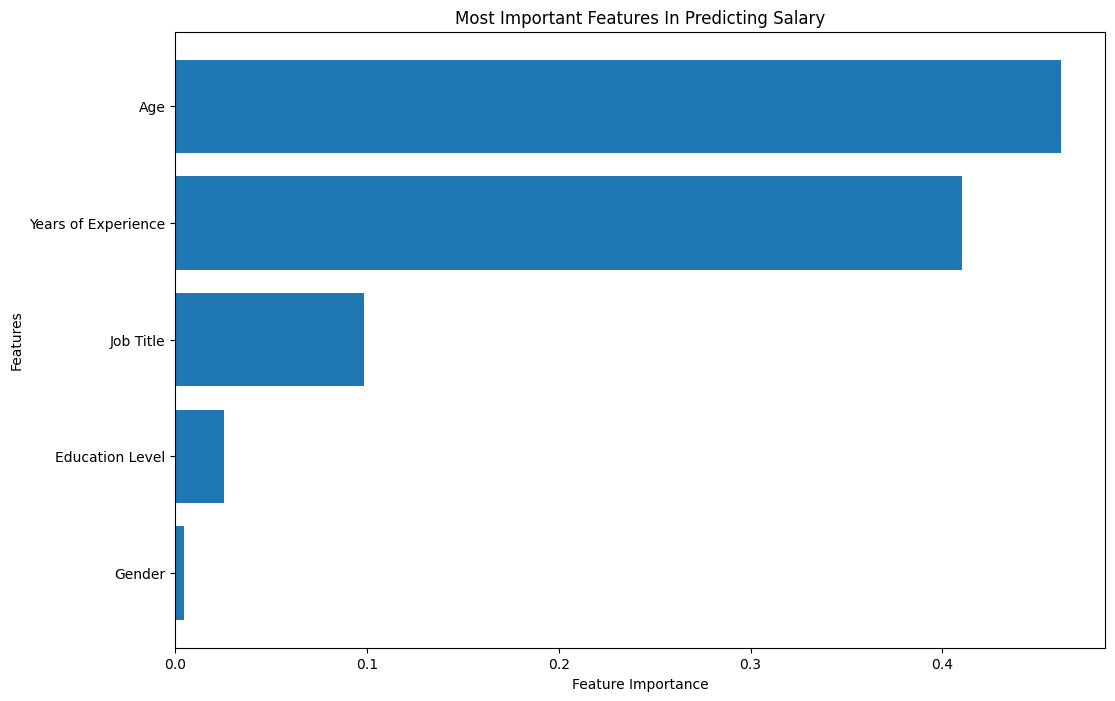

In [43]:
print('Most important features in predicting the salary for training set for Training File:- \n')
impf(sftr)

Most important features in predicting the salary for testing set for Training File:- 



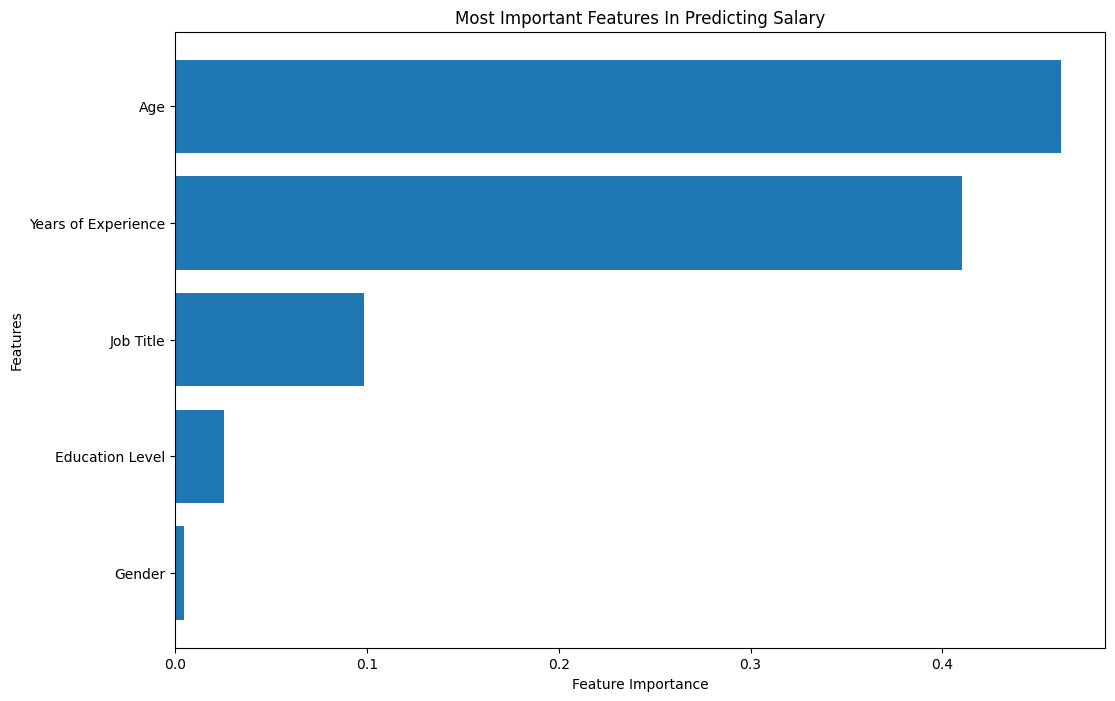

In [44]:
print('Most important features in predicting the salary for testing set for Training File:- \n')
impf(sft)

Most important features in predicting the salary for training set for Testing File:- 



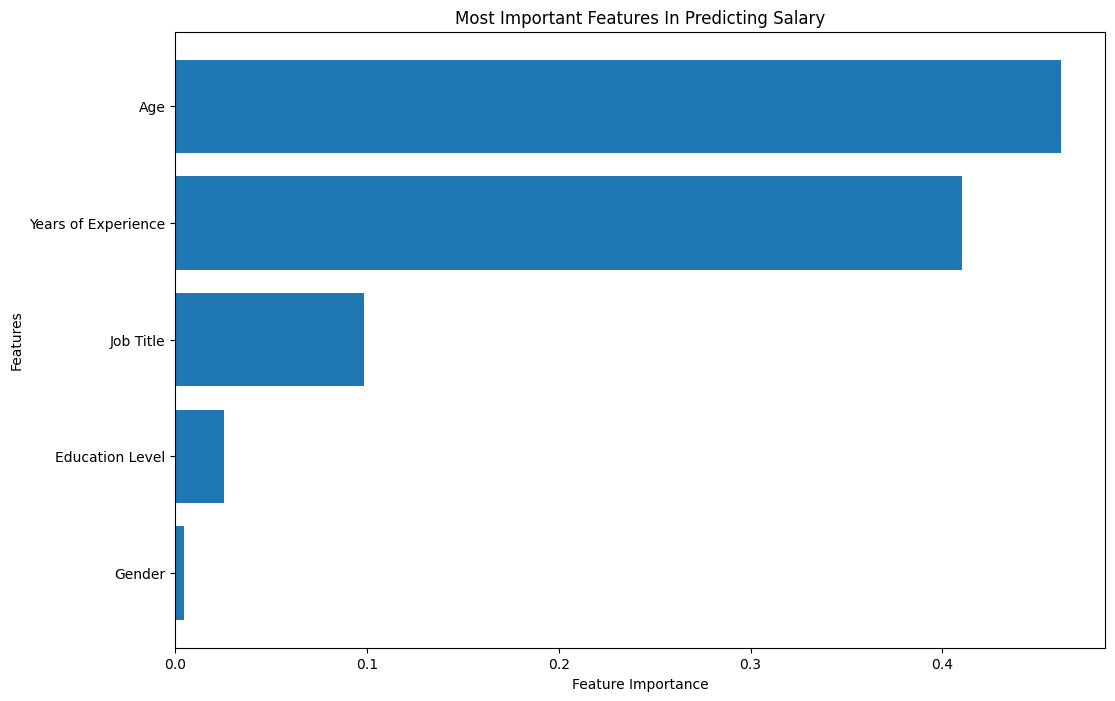

In [45]:
print('Most important features in predicting the salary for training set for Testing File:- \n')
impf(sttr)

Most important features in predicting the salary for testing set for Testing File:- 



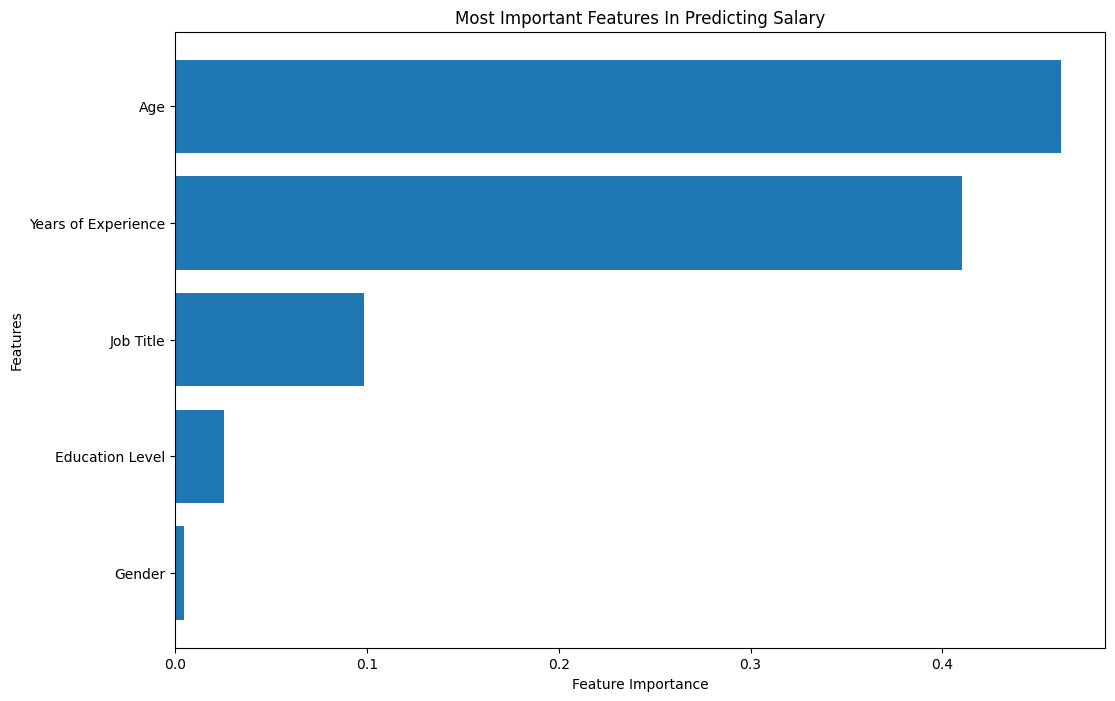

In [46]:
print('Most important features in predicting the salary for testing set for Testing File:- \n')
impf(stt)

In [47]:
print("Final average evaluation values:-")
print(f"Final r-squared value: {rm}.")
print(f"Final mean absolute error: {em}.")
print(f"Final mean squared error: {sm}.")

Final average evaluation values:-
Final r-squared value: -1.9735181390709595.
Final mean absolute error: 32266.744883383337.
Final mean squared error: 2735012612.4945264.


#### Performing the final test. 

In [48]:
FT=pa.read_csv('FINALTEST.csv')

In [49]:
FT.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [50]:
FT.dropna(inplace=True)

In [51]:
print(f"Shape of Final Testing File: {FT.shape}.")

Shape of Final Testing File: (20, 6).


In [52]:
finalscores=[]
FT['Gender']=le.fit_transform(FT['Gender'])
FT['Education Level']=le.fit_transform(FT['Education Level'])
FT['Job Title']=le.fit_transform(FT['Job Title'])
FTP=FT['Salary']
FTF=FT.drop('Salary',axis=1)
FTtr,FTt,FTStr,FTSt=tts(FTF,FTP,test_size=15,random_state=1)
for model_name,m in model_params.items():
    clf=GSC(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(FTtr,FTStr)
    finalscores.append({
    'File':"Final Testing File",
    'Parameters':clf.best_params_,
    'MSE(-ve)':clf.best_score_
    })
pa.DataFrame(finalscores)

,File,Parameters,MSE(-ve)
0,Final Testing File,{'n_estimators': 10},-1.844281e+09


In [53]:
rfr.fit(FTtr,FTStr)

RandomForestRegressor(n_estimators=32)

In [54]:
rfr.score(FTt,FTSt)

0.09464812328125582

In [55]:
FTrp=rfr.predict(FTtr)
FTp=rfr.predict(FTt)

In [56]:
rr=R2(FTStr,FTrp)
rt=R2(FTSt,FTp)
rfm=((rr+rt)/2)
er=MAE(FTStr,FTrp)
et=MAE(FTStr,FTrp)
efm=((er+et)/2)
sr=MSE(FTStr,FTrp)
st=MSE(FTStr,FTrp)
sfm=((sr+st)/2)
print("Final Testing File \n")
print("Training Set:- ")
print(f"1. R-squared value: {rr}.")
print(f"2. Mean Absolute Error: {er}.")
print(f"3. Mean Squared Error: {sr}.")
print("\nTesting Set:- ")
print(f"1. R-squared value: {rr}.")
print(f"2. Mean Absolute Error: {er}.")
print(f"3. Mean Squared Error: {sr}.")
print("Average:-")
print(f"Final r-squared value: {rfm}.")
print(f"Final mean absolute error: {efm}.")
print(f"Final mean squared error: {sfm}.")

Final Testing File 

Training Set:- 
1. R-squared value: 0.8243910836498999.
2. Mean Absolute Error: 11585.555370000002.
3. Mean Squared Error: 194623104.20695388.

Testing Set:- 
1. R-squared value: 0.8243910836498999.
2. Mean Absolute Error: 11585.555370000002.
3. Mean Squared Error: 194623104.20695388.
Average:-
Final r-squared value: 0.45951960346557785.
Final mean absolute error: 11585.555370000002.
Final mean squared error: 194623104.20695388.


> The model may therefore be now considered as ready for practical use. 

#### MODEL USER INTERFACE

In [57]:
jl.dump({'rfr_model':rfr,'le':le},'rfr_model.pkl')

['rfr_model.pkl']

In [58]:
nf=[]
def ps(a,g,e,j,x):
    feat=[a,g,e,j,x]
    nf=feat
    for z in range(1,4):
        nf[z]=le.fit_transform(feat[z])
    s=rfr.predict([nf])
    return f"Rs. {s[0]}"
ge=["Female","Male"]
eds=["High School","Bachelor","Master","PhD"]
jobs=["Director","Analyst","Manager","Engineer"]
OP=gr.Interface(fn=ps,inputs=[gr.Slider(minimum=18,maximum=64,label="AGE",step=1),gr.Dropdown(choices=ge,label="GENDER"),gr.Dropdown(choices=eds,label="EDUCATION LEVEL"),gr.Dropdown(choices=jobs,label="JOB TITLE"),gr.Slider(minimum=1,maximum=30,label="YEARS OF EXPERIENCE",step=1)],outputs=gr.Number(label="Estimated Salary"),title="SALARY PREDICTION MODEL")

In [ ]:
OP.launch(inline=True)